In [1]:
# Monta o drive para ler os dados salvos no mesmo
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
!pip3 install pickle5
import pickle5 as pickle

     |████████████████████████████████| 133kB 3.9MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219264 sha256=930430b51882c35f6b2d2dafe78a0ffd7b75fcdcd0d41e41de111c959dbd5e32
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [8]:
#carrega as bibliotecas necessárias
import os
#import pickle
import cv2
import nibabel as nib
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt


In [4]:
def normImage(orig_image):
    image = orig_image.copy()
    image-=np.min(image)
    if np.max(image)>0:
      image = (image/np.max(image))
    return image

In [5]:
#lista os arquivos
ct0_path = "/content/gdrive/MyDrive/COVID19_1110/studies/CT-0"
ct1_path = "/content/gdrive/MyDrive/COVID19_1110/studies/CT-1"
ct2_path = "/content/gdrive/MyDrive/COVID19_1110/studies/CT-2"
#
masks_path = "/content/gdrive/MyDrive/COVID19_1110/masks"

mask_files = os.listdir(masks_path)
mask_files.sort()
#
ct0_files = os.listdir(ct0_path)
ct0_files.sort()
ct1_files = os.listdir(ct1_path)
ct1_files.sort()
ct2_files = os.listdir(ct2_path)
ct2_files.sort()

In [6]:
train_data = []
test_data = []
train_labels = []
test_labels = []

# model = load_model(os.path.join("/content/gdrive/MyDrive/dados","DNN_lungs_segmentation.hdf5")) # descomentar caso queira que os dados sejam passados antes lelos modelos

for f_idx,f in enumerate(mask_files): 
    print(f)
    full_mask_path = os.path.join(masks_path, f)
    
    mask = nib.load(full_mask_path)
    n_masks = mask.dataobj.shape[-1]
    
    image_name_parts = f.split('_mask')
    image_name = image_name_parts[0]+image_name_parts[-1]
    if image_name in ct1_files:
        full_image_path = os.path.join(ct1_path, image_name) 
        ct_image = nib.load(full_image_path)
    elif image_name in ct2_files:
        full_image_path = os.path.join(ct2_path, image_name)
        ct_image = nib.load(full_image_path)
    else:
        print("vish")
        print(image_name)
        break
    
    
    id_m = [] # armazena os indices do arquivo que contém marcações
    
    ht_image_path = os.path.join(ct0_path, ct0_files[f_idx]) 
    cth_image = nib.load(ht_image_path)
      
    for m_slice in range(n_masks):
        if mask.dataobj[:,:,m_slice].max()> 0:
            
            

            norm_cvd_img = normImage(cv2.resize(ct_image.dataobj[:,:,m_slice],
                                               (256,256),
                                               cv2.INTER_LINEAR))                                 
            # lungs_mask = model.predict(norm_cvd_img.reshape((1,256,256,1))) # descomenta caso queira a mascara do pulmão
            
            
            if f_idx<40:
                train_data.append(norm_cvd_img.reshape((256,256)))   # caso queira o CT original
                # train_data.append(lungs_mask.reshape((256,256))) # caso queira a mascara do pulmão
                train_labels.append(1)
            else:
                test_data.append(norm_cvd_img.reshape((256,256)))   # caso queira o CT original
                # test_data.append(lungs_mask.reshape((256,256)))  # caso queira a mascara do pulmão
                test_labels.append(1)
            
            #adicionar a mesma quantidade de frames aleatérios de pacientes saudáveis 
            # em regioes parecidas do ct           
            mh_slice = int(m_slice)
            if mh_slice >= cth_image.dataobj.shape[2]:
                mh_slice = np.random.randint( cth_image.dataobj.shape[2]//2,
                                             cth_image.dataobj.shape[2]-1)

            norm_hty_img = normImage(cv2.resize(cth_image.dataobj[:,:,mh_slice],
                                               (256,256),
                                               cv2.INTER_LINEAR))
            # lungs_mask = model.predict(norm_hty_img.reshape((1,256,256,1)))

            
            if f_idx<40:
                train_data.append(norm_hty_img.reshape((256,256)))  # caso queira o CT original
                # train_data.append(lungs_mask.reshape((256,256)))  # caso queira a mascara do pulmão
                train_labels.append(0)
            else:
                test_data.append(norm_hty_img.reshape((256,256)))   # caso queira o CT original
                # test_data.append(lungs_mask.reshape((256,256)))  # caso queira a mascara do pulmão
                test_labels.append(0)



study_0255_mask.nii.gz
study_0256_mask.nii.gz
study_0257_mask.nii.gz
study_0258_mask.nii.gz
study_0259_mask.nii.gz
study_0260_mask.nii.gz
study_0261_mask.nii.gz
study_0262_mask.nii.gz
study_0263_mask.nii.gz
study_0264_mask.nii.gz
study_0265_mask.nii.gz
study_0266_mask.nii.gz
study_0267_mask.nii.gz
study_0268_mask.nii.gz
study_0269_mask.nii.gz
study_0270_mask.nii.gz
study_0271_mask.nii.gz
study_0272_mask.nii.gz
study_0273_mask.nii.gz
study_0274_mask.nii.gz
study_0275_mask.nii.gz
study_0276_mask.nii.gz
study_0277_mask.nii.gz
study_0278_mask.nii.gz
study_0279_mask.nii.gz
study_0280_mask.nii.gz
study_0281_mask.nii.gz
study_0282_mask.nii.gz
study_0283_mask.nii.gz
study_0284_mask.nii.gz
study_0285_mask.nii.gz
study_0286_mask.nii.gz
study_0287_mask.nii.gz
study_0288_mask.nii.gz
study_0289_mask.nii.gz
study_0290_mask.nii.gz
study_0291_mask.nii.gz
study_0292_mask.nii.gz
study_0293_mask.nii.gz
study_0294_mask.nii.gz
study_0295_mask.nii.gz
study_0296_mask.nii.gz
study_0297_mask.nii.gz
study_0298_

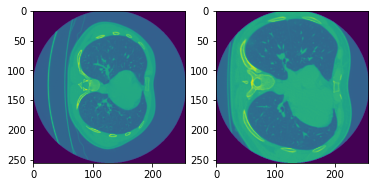

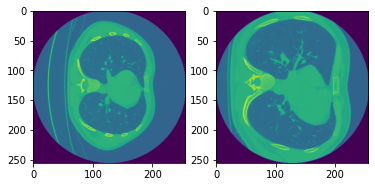

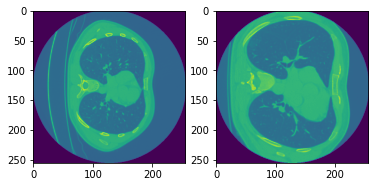

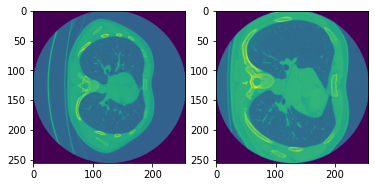

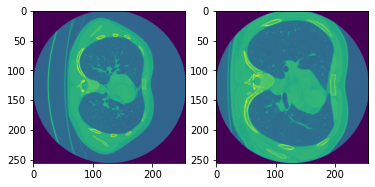

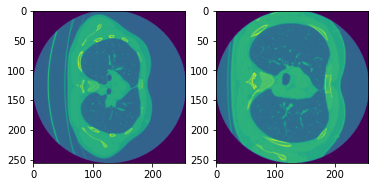

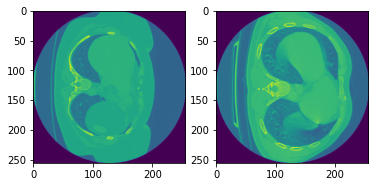

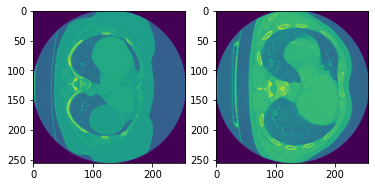

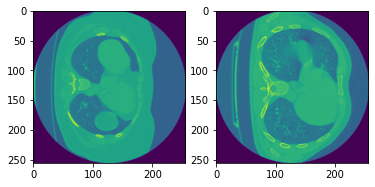

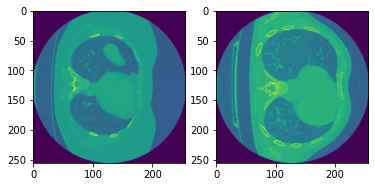

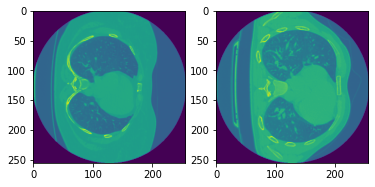

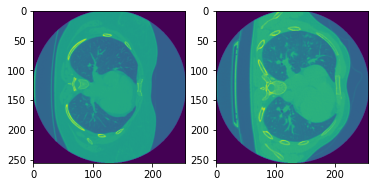

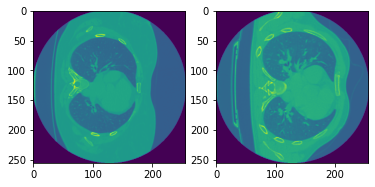

In [10]:
#Apresentar parte do dataset
for i in range(25,51,2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    cvd = test_data[i-1].copy()
    #cvd[cvd>=0.5]=1
    #cvd[cvd<0.5]=0
    hty = test_data[i].copy()
    #hty[hty>0.5]=1
    #hty[hty<=0.5]=0
    ax1.imshow(hty)
    ax2.imshow(cvd)

In [11]:
#Salvar o dataset
dataset = {'X_train':train_data,
           'y_train':train_labels,
           'X_test':test_data,
           'y_test':test_labels}

# with open('covid_set_256x256_raw.pickle', 'wb') as handle:
#     pickle.dump(dataset, handle, protocol=pickle.HIGHEST_PROTOCOL)